# Simple rule implementation
One simple rule for elementary (1$D$) cellular automata.

The rule is going to be: **If the two neighbors are $0$, set the center cell to $1$. Otherwise, leave it as $0.$**

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import time

## Long way

In [2]:
# Not so little function
def long_way(array):

    # Length
    n = len(array)

    # Loop
    for m in range(n):

        # Boundaries
        if m == 0:
            # Condition
            if (array[n-1] == 0) and (array[1] == 0):
                array[m] = 1

            else:
                array[m] = 0

        elif m == n-1:
            # Condition
            if (array[n-2] == 0) and (array[0] == 0):
                array[m] = 1
            
            else:
                array[m] = 0

        # Other elements
        else:
            if (array[m-1] == 0) and (array[m+1] == 0):
                array[m] = 1
            else:
                array[m] = 0

    return array

## Short way

In [3]:
# Actually little function
def short_way(array):

    # Length
    n = len(array)   

    # Loop 
    for i in range(n):

        # Get left and right neighbors with circular boundary
        left = array[(i-1) % n]
        right = array[(i+1) % n]
        
        # Rule
        if left == 0 and right == 0:
            array[i] = 1
            
    return array

### (Modulo operator parenthesis)

In [4]:
# The modulo operator for positive number
# is just the remainder of the division
a = 5 % 3
a

2

In [5]:
# While for negative numbers, it is the
# remainder of the division plus the divisor
b = -5 % 3
print(b)

# Specifically, it is computed in this way
# result = dividend - (divisor * (dividend // divisor))
c = -5 - (3 * (-5 // 3))
c = -5 - (3 * -2)
c = -5 + 6
print(c)

1
1


## Usage and visualization

In [6]:
# Define the shape of the array
shape = 30

# Create the array
array = np.zeros(shape)

# Also create two empty lists
long_image = []
short_image = []

In [7]:
# "Long" loop
start = time.time()

for _ in range(shape):

    # Call the function
    cell_array = long_way(array)

    # Store it
    long_image.append(cell_array)

    # Rename it
    array = cell_array

end = time.time()

print(f"Long way took {(end - start):.6f} seconds.")

Long way took 0.000792 seconds.


In [8]:
# "Short" loop
start = time.time()

for _ in range(shape):

    # Call the function
    cell_array = short_way(array)

    # Store it
    short_image.append(cell_array)

    # Rename it
    array = cell_array

end = time.time()

print(f"Short way took {(end - start):.6f} seconds.")

Short way took 0.001134 seconds.


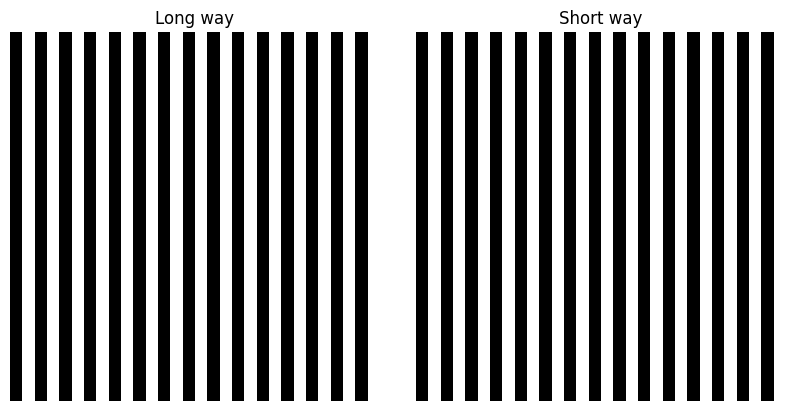

In [9]:
# See both results in a two panel figure with no axis
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(long_image, cmap='binary')
ax[0].axis('off')
ax[0].set_title('Long way')
ax[1].imshow(short_image, cmap='binary')
ax[1].axis('off')
ax[1].set_title('Short way')

# Horizontal space
plt.subplots_adjust(wspace=0.1)
plt.show()

Surprisingly, the "short" way seems to take longer! Nonetheless, the implementations work.